In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('../Datasets/Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
X , y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]], dtype=int64),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000], dtype=int64))

In [5]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X,y)


DecisionTreeRegressor(random_state=0)

In [6]:
regressor.predict([[6.5]])

array([150000.])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4512\1004541739.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X),max(X),0.1)


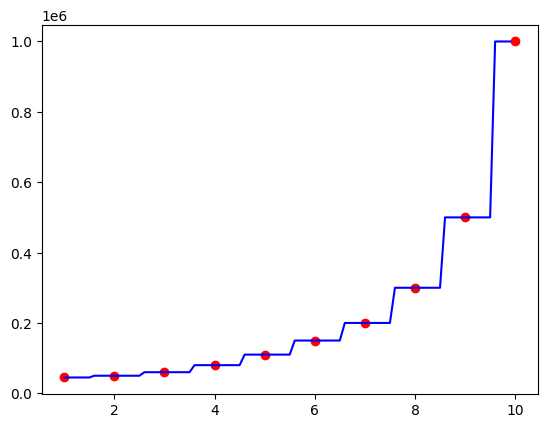

In [7]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color = 'red')
plt.plot(X_grid,regressor.predict(X_grid), color = 'blue')

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeRegressor


In [17]:
dataset = load_breast_cancer()

X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X,y

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(
    X,y,test_size=0.33,random_state=42
)

In [19]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

In [35]:
y_pred = regressor.predict(X_test)
y_pred, y_test

(array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
        0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1.,
        1.]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
  

In [37]:
from sklearn.metrics import accuracy_score, r2_score

accuracy_score(y_pred, y_test)

0.9521276595744681

In [25]:
parameter = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,10,11],
    'max_features' : ['auto', 'sqrt' , 'log2']
}

In [26]:
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor , param_grid= parameter , cv=5 , scoring= 'neg_mean_squared_error')

In [28]:
regressorcv.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
   

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [29]:
regressorcv.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'max_features': 'log2',
 'splitter': 'best'}

In [38]:
y_pred = regressorcv.predict(X_test)
y_pred


array([0.5       , 0.00925926, 0.00925926, 1.        , 1.        ,
       0.00925926, 0.00925926, 0.00925926, 0.14285714, 1.        ,
       1.        , 0.00925926, 1.        , 0.00925926, 1.        ,
       0.00925926, 1.        , 1.        , 1.        , 0.00925926,
       1.        , 1.        , 0.00925926, 1.        , 1.        ,
       0.33333333, 1.        , 1.        , 1.        , 0.00925926,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.00925926, 1.        , 0.00925926, 0.33333333,
       1.        , 0.00925926, 1.        , 1.        , 1.        ,
       1.        , 0.06666667, 1.        , 1.        , 1.        ,
       0.00925926, 0.00925926, 0.06666667, 1.        , 1.        ,
       1.        , 1.        , 0.00925926, 0.14285714, 1.        ,
       1.        , 0.00925926, 0.00925926, 1.        , 1.        ,
       1.        , 0.00925926, 0.00925926, 1.        , 1.        ,
       0.14285714, 0.00925926, 1.        , 0.00925926, 1.     

In [39]:
r2_score(y_pred,y_test)

0.686820364657478